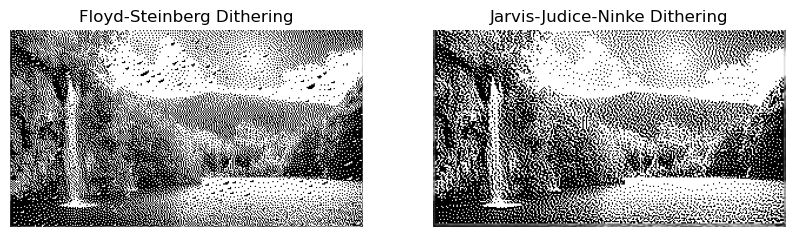

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = Image.open('Nature.jpeg').convert('L')
image_array = np.array(image)

def floyd_steinberg_dithering(img):
    """Applies Floyd-Steinberg dithering to the image."""
    for y in range(img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            old_pixel = img[y, x]
            new_pixel = 255 * round(old_pixel / 255)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y, x + 1] += error * 7 / 16
            img[y + 1, x - 1] += error * 3 / 16
            img[y + 1, x] += error * 5 / 16
            img[y + 1, x + 1] += error * 1 / 16
    return img

def jjn_dithering(img):
    """Applies Jarvis-Judice-Ninke dithering to the image."""
    kernel = np.array([
        [0, 0, 0, 7, 5],
        [3, 5, 7, 5, 3],
        [1, 3, 5, 3, 1]
    ]) / 48.0

    img = img.astype(float)
    for y in range(img.shape[0] - 3):
        for x in range(2, img.shape[1] - 2):
            old_pixel = img[y, x]
            new_pixel = 255 * round(old_pixel / 255)
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y:y+3, x-2:x+3] += error * kernel
    return np.clip(img, 0, 255).astype(np.uint8)

# Apply both dithering methods
floyd_result = floyd_steinberg_dithering(image_array.copy())
jjn_result = jjn_dithering(image_array.copy())

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(floyd_result, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(jjn_result, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.show()


Explanation of Dithering Algorithms:1. Floyd-Steinberg Dithering:
• Concept: Floyd-Steinberg is an error diffusion dithering algorithm. It converts a grayscale image into a 
binary (black-and-white) image by distributing the quantization error of a pixel to neighboring pixels.
• Method:
• For each pixel, the algorithm rounds the grayscale value to the nearest black or white value.
• The quantization error is spread to nearby pixels (typically right, bottom, and diagonals) based on 
predefined weights.
2. Jarvis-Judice-Ninke (JJN) Dithering:
• Concept: JJN is a more complex dithering algorithm that also spreads quantization error to neighboring 
pixels, but over a larger area compared to Floyd-Steinberg.
• Method:
• The error is distributed to pixels up to two rows below and two columns to the right, using a larger kernel 
with more weights.
• This tends to produce smoother gradients at the cost of computational complexity.
Comparison:
1. Floyd-Steinberg Dithering:
• Image Appearance:
• The image looks more grainy, with a noisy texture.
• It introduces many small dots to approximate grayscale values, leading to a high level of detail but with 
visible noise.
• The edges, like those in the trees and waterfall, are somewhat sharp but with noticeable noise around 
them.
• Strengths:
• Good for small, detailed textures.
• Fast and computationally efficient.
2
• Limitations:
• Can introduce a noisy appearance, as seen in your output.
1. Jarvis-Judice-Ninke Dithering:
• Image Appearance:
• The result from JJN dithering is smoother and less noisy.
• You can see larger continuous patterns, which helps with better gradient approximation (e.g., sky and 
water).
• The waterfall edges look more polished compared to the Floyd-Steinberg output, with fewer small dots 
scattered around.
• Strengths:
• Smooth gradients and better quality in larger areas.
• Reduces visual noise compared to Floyd-Steinberg.
• Limitations:
• More computationally expensive.
• May introduce some visible banding or pattern artifacts in some areas, as seen in the top right of the JJN 
output.
Conclusion:
• Floyd-Steinberg dithering gives better results for high-detail areas but introduces more noise.
• JJN dithering provides a smoother result and works well with gradients or areas with fewer details.
• From image, JJN is better for scenes with continuous changes (like landscapes) since it maintains 
a smoother appearance, whereas Floyd-Steinberg is useful for detailed, intricate patterns but with a 
tradeoff in noise.
This comparison helps explain the visual differences between the two methods. Let me know if further 
clarification is needed!